In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [4]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [6]:
NUM_CLASSES = 7

# 学習データ読み込み

In [8]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [9]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [13]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier.keras', 
    verbose=1, 
    save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [15]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 14s 440ms/step - accuracy: 0.1719 - loss: 2.1534
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2013 - loss: 2.0409 - val_accuracy: 0.2602 - val_loss: 1.8225
Epoch 2/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2812 - loss: 1.8586
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2695 - loss: 1.8138 - val_accuracy: 0.3303 - val_loss: 1.6725
Epoch 3/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3516 - loss: 1.7510
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3151 - loss: 1.7029 - val_accuracy: 0.3696 - val_loss: 1.5648
Epoch 4/1000
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4375 - loss: 1.5240
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [18]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9225 - loss: 0.3773


In [19]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [20]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[9.6817458e-01 2.5765920e-02 3.3259566e-04 7.0672028e-04 4.5219166e-03
 2.7184187e-06 4.9557083e-04]
0


# 混同行列

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step


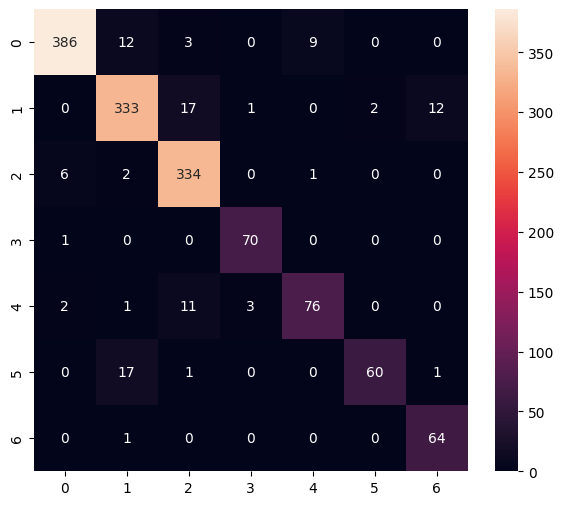

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       410
           1       0.91      0.91      0.91       365
           2       0.91      0.97      0.94       343
           3       0.95      0.99      0.97        71
           4       0.88      0.82      0.85        93
           5       0.97      0.76      0.85        79
           6       0.83      0.98      0.90        65

    accuracy                           0.93      1426
   macro avg       0.92      0.91      0.91      1426
weighted avg       0.93      0.93      0.93      1426



In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [24]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [25]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmp_sg_e01g/assets


INFO:tensorflow:Assets written to: /var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmp_sg_e01g/assets


Saved artifact at '/var/folders/9w/tjsxm7tx04v_y083kvxph2300000gn/T/tmp_sg_e01g'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  11456123664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11456127888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11456125392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11456126352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11456128080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  11480992848: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1731826583.977425 3774860 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1731826583.977462 3774860 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1731826583.981000 3774860 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


6668

# 推論テスト

In [27]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [28]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [30]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 59 μs, sys: 30 μs, total: 89 μs
Wall time: 73 μs


In [31]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.6817458e-01 2.5765903e-02 3.3259566e-04 7.0671993e-04 4.5219203e-03
 2.7184217e-06 4.9557036e-04]
0
